In [55]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [56]:
N = 20 
X = np.random.random(N) * 10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)

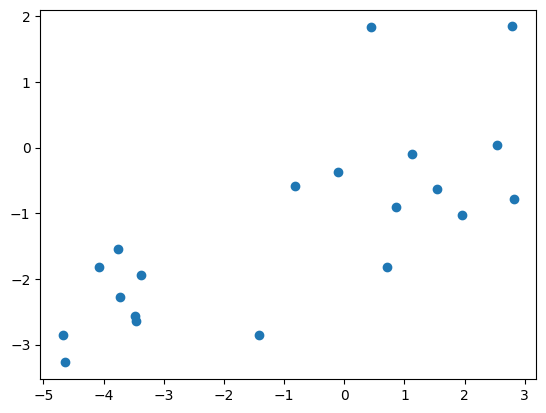

In [57]:
plt.scatter(X, Y)

In [58]:
model = nn.Linear(1, 1)

In [59]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [60]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [61]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [62]:
epochs = 30

losses = []

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {i + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 4.1911
Epoch 2/30, Loss: 2.8416
Epoch 3/30, Loss: 2.1081
Epoch 4/30, Loss: 1.6747
Epoch 5/30, Loss: 1.4031
Epoch 6/30, Loss: 1.2266
Epoch 7/30, Loss: 1.1095
Epoch 8/30, Loss: 1.0308
Epoch 9/30, Loss: 0.9775
Epoch 10/30, Loss: 0.9414
Epoch 11/30, Loss: 0.9169
Epoch 12/30, Loss: 0.9002
Epoch 13/30, Loss: 0.8889
Epoch 14/30, Loss: 0.8812
Epoch 15/30, Loss: 0.8759
Epoch 16/30, Loss: 0.8723
Epoch 17/30, Loss: 0.8699
Epoch 18/30, Loss: 0.8682
Epoch 19/30, Loss: 0.8671
Epoch 20/30, Loss: 0.8663
Epoch 21/30, Loss: 0.8658
Epoch 22/30, Loss: 0.8654
Epoch 23/30, Loss: 0.8652
Epoch 24/30, Loss: 0.8650
Epoch 25/30, Loss: 0.8649
Epoch 26/30, Loss: 0.8648
Epoch 27/30, Loss: 0.8648
Epoch 28/30, Loss: 0.8648
Epoch 29/30, Loss: 0.8647
Epoch 30/30, Loss: 0.8647


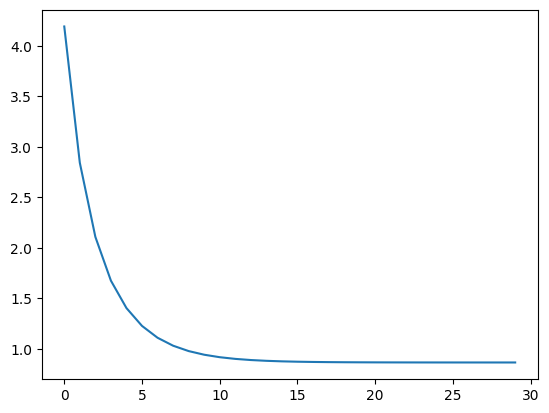

In [63]:
plt.plot(losses)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


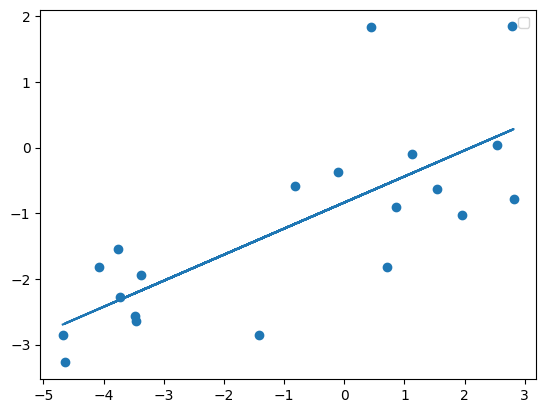

In [66]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y)
plt.plot(X, predicted)
plt.legend()
plt.show()

In [67]:
# Another way without detach
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-0.65936506],
       [-0.22274226],
       [-2.218957  ],
       [-1.1617234 ],
       [-0.87838537],
       [-2.2093039 ],
       [-0.55122304],
       [-2.3133216 ],
       [ 0.27172875],
       [-2.6774623 ],
       [-0.06125903],
       [ 0.16873634],
       [-0.49739492],
       [-2.1775239 ],
       [-1.3955104 ],
       [ 0.28180003],
       [-2.456962  ],
       [-2.3269587 ],
       [-0.38632244],
       [-2.6932273 ]], dtype=float32)

In [69]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.39704368]] [-0.8361846]
